In [52]:
data = pd.read_csv("D:\\dm\\hw4\\adult_test.csv", delimiter='\,', names=columns, header=None, index_col=False, engine = 'python')
data['age'] = data['age'].apply(lambda x: x.replace('"', ''))
data['Income'] = data['Income'].apply(lambda x: x.replace('"', ''))
data.to_csv("D:\\dm\\hw4\\ad_t.csv", index=False)
data.shape

(16281, 15)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","Income"]
data = pd.read_csv("D:\\dm\\hw4\\adult.csv", delimiter='\,', names=columns, header=None, index_col=False, engine = 'python')
data['age'] = data['age'].apply(lambda x: x.replace('"', ''))
data['Income'] = data['Income'].apply(lambda x: x.replace('"', ''))

#####
data = data[data["workclass"] != " ?"]
data = data[data["occupation"] != " ?"]
data = data[data["native-country"] != " ?"]
####
col_con = set(data.describe().columns)
col_cat =set(data.columns)
for col in col_con:
    col_cat.remove(col)
####
data = data.drop('education',1)
col_cat.remove('education')
col_cat.remove('age')
####
data_tr = data.copy(deep=True)
data_tr.dtypes
col_cat
for col_name in col_cat:
    data_tr[col_name]= data_tr[col_name].astype('category')
    u, data_tr[col_name] = np.unique(data_tr[col_name], return_inverse=True)

data.head()
#######
data_tr['age'] = pd.to_numeric(data_tr['age'], errors='coerce')

###
col_num = []
for col in data.columns:
    if col not in col_cat:
        col_num.append(col)
####
data_tr['gain_bin'] = pd.cut(data_tr['capital-gain'], [0, 2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,100000], 
                             labels=[1,2,3,4,5,6,7,8,9,10,11],include_lowest=True)
#####
data_tr['loss_bin'] = pd.cut(data_tr['capital-loss'], [0, 500,1000,1500,2000,2500,3000,3500,4000,4500], 
                             labels=[1,2,3,4,5,6,7,8,9],include_lowest=True)

#data_tr['age_bin'] = pd.cut(data_tr['age'], [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
 #                            labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],include_lowest=True)
####
data['gain_bin'] = data_tr['gain_bin']
data['loss_bin'] = data_tr['loss_bin']
#data['age_bin'] = data_tr['age_bin']
#####
features = set(data_tr.columns)
features.remove('capital-loss')
features.remove('capital-gain')
#features.remove('loss_bin')
#features.remove('age')
features.remove('Income')
####


In [2]:
features.remove('native-country')
features.remove('race')
features.remove('marital-status')
features.remove('sex')

In [3]:
data_test = pd.read_csv("D:\\dm\\hw4\\adult_test.csv", delimiter='\,', names=columns, header=None, index_col=False, engine = 'python')
data_test['age'] = data_test['age'].apply(lambda x: x.replace('"', ''))
data_test['Income'] = data_test['Income'].apply(lambda x: x.replace('."', ''))

In [4]:
data_test = data_test[data_test["workclass"] != " ?"]
data_test = data_test[data_test["occupation"] != " ?"]
data_test = data_test[data_test["native-country"] != " ?"]
####
col_con = set(data_test.describe().columns)
col_cat =set(data_test.columns)
for col in col_con:
    col_cat.remove(col)
####
data_test = data_test.drop('education',1)
col_cat.remove('education')
col_cat.remove('age')
####
data_ts = data_test.copy(deep=True)
data_ts.dtypes
col_cat
for col_name in col_cat:
    data_ts[col_name]= data_ts[col_name].astype('category')
    u, data_ts[col_name] = np.unique(data_ts[col_name], return_inverse=True)

#######
data_ts['age'] = pd.to_numeric(data_test['age'], errors='coerce')

###
col_num = []
for col in data_test.columns:
    if col not in col_cat:
        col_num.append(col)
####
data_ts['gain_bin'] = pd.cut(data_ts['capital-gain'], [0, 2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,100000], 
                             labels=[0,1, 2, 3,4,5,6,7,8,9,10],include_lowest=True)
#####
data_ts['loss_bin'] = pd.cut(data_ts['capital-loss'], [0, 500,1000,1500,2000,2500,3000,3500,4000,4500], 
                             labels=[0,1, 2, 3,4,5,6,7,8],include_lowest=True)

#data_ts['age_bin'] = pd.cut(data_ts['age'], [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
 #                            labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],include_lowest=True)
####
data_test['gain_bin'] = data_ts['gain_bin']
data_test['loss_bin'] = data_ts['loss_bin']

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = list(range(200,1000,200))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(4,10,2))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 8, None], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [15]:
X = data_tr[list(features)]
Y = data_tr['Income']
names = X.columns
test_X = data_ts[list(features)]
test_Y = data_ts['Income']

In [13]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min


KeyboardInterrupt: 

In [16]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, Y)
base_accuracy = evaluate(base_model, test_X, data_ts['Income'])

best_random = rf_random.best_estimator_
random_accuracy = evaluate(base_model, test_X, data_ts['Income'])

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2176 degrees.
Accuracy = -inf%.


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [17]:
#output for various values of k
from sklearn.metrics import confusion_matrix
def results_K(tp,fp,fn,tn):
    print("True Positive:       ",tp)
    print("False Positive:      ",fp)
    print("True Negative:       ",tn)
    print("False Negative:      ",fn)
    r = tp/(tp+fp)
    print("Precision:           ",r)
    p = tp/(tp+fn)
    print("Recall:              ",p)
    print("F-Measure:           ",2*r*p/(r+p))
    correct = tp+tn
    incorrect = fp+fn
    print("Classification rate: ",correct/(correct+incorrect))
    print("Error rate:          ",incorrect/(correct+incorrect))



In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
X = data_tr[list(features)]
Y = data_tr['Income']
names = X.columns
rf =  RandomForestClassifier(n_estimators=80, max_depth=7, min_samples_split=2,
                            min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                            random_state=None)
rf.fit(X, Y)

test_X = data_ts[list(features)]
test_Y = data_ts['Income']
data_ts['res'] = rf.predict(test_X)

data_ts['res'] = np.where(data_ts['res']<=0.5 , 0, 1)
tp, fn, fp, tn = confusion_matrix(data_ts['Income'],data_ts['res']).ravel()
results_K(tp,fp,fn,tn)

True Positive:        10888
False Positive:       2036
True Negative:        1664
False Negative:       472
Precision:            0.84246363355
Recall:               0.958450704225
F-Measure:            0.896722121562
Classification rate:  0.833466135458
Error rate:           0.166533864542


In [28]:
from sklearn import metrics
probs = rf.predict_proba(test_X)
fpr, tpr, thresholds = metrics.roc_curve(data_ts['Income'], probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.89870799628854203

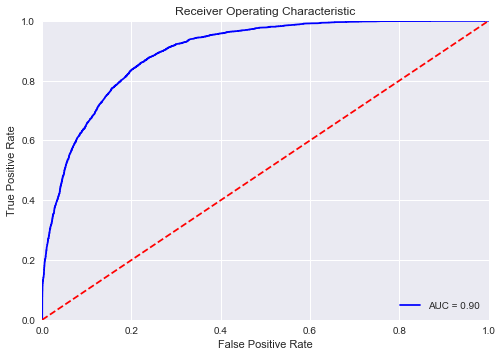

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_samples_leaf=4,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf = clf.fit(X, Y)
data_ts['dec_res']= clf.predict(test_X)
tp, fn, fp, tn = confusion_matrix(data_ts['Income'],data_ts['dec_res']).ravel()
results_K(tp,fp,fn,tn)


True Positive:        10840
False Positive:       2206
True Negative:        1494
False Negative:       520
Precision:            0.830906024835
Recall:               0.954225352113
F-Measure:            0.888306154224
Classification rate:  0.818990703851
Error rate:           0.181009296149


In [34]:
probs = clf.predict_proba(test_X)
fpr, tpr, thresholds = metrics.roc_curve(data_ts['Income'], probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.83064651931861455

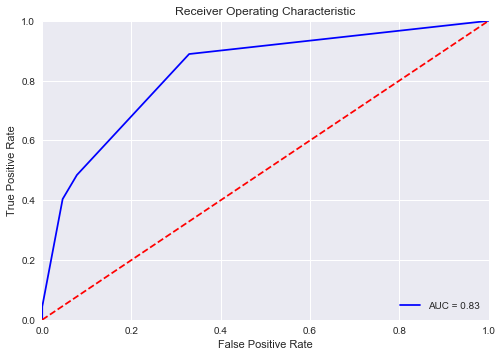

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
from sklearn import preprocessing

ts = data_ts.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
ts_scaled = min_max_scaler.fit_transform(ts)
df_norm_ts = pd.DataFrame(ts_scaled, columns = data_ts.columns)

tr = data_tr.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
tr_scaled = min_max_scaler2.fit_transform(tr)
df_norm_tr = pd.DataFrame(tr_scaled, columns = data_tr.columns)

X_n = df_norm_tr[list(features)]
Y_n = df_norm_tr['Income']

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


True Positive:        10806
False Positive:       2159
True Negative:        1541
False Negative:       554
Precision:            0.833474739684
Recall:               0.951232394366
F-Measure:            0.888468653649
Classification rate:  0.819853917663
Error rate:           0.180146082337
0.8345481181


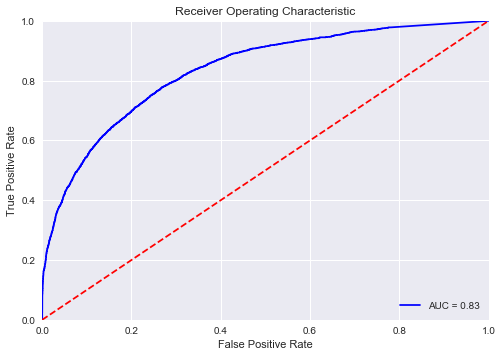

In [57]:
from sklearn.neural_network import MLPClassifier
clfn = MLPClassifier(solver='sgd', alpha=1,hidden_layer_sizes=(2, 8), random_state=20)
clfn.fit(X_n, Y_n) 
data_ts['dec_nn']= clfn.predict(df_norm_ts[list(features)])
tp, fn, fp, tn = confusion_matrix(data_ts['Income'],data_ts['dec_nn']).ravel()
results_K(tp,fp,fn,tn)
probs = clfn.predict_proba(df_norm_ts[list(features)])
fpr, tpr, thresholds = metrics.roc_curve(data_ts['Income'], probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn import svm
clfn = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clfn.fit(X_n, Y_n) 
data_ts['dec_svm']= clfn.predict(df_norm_ts[list(features)])
tp, fn, fp, tn = confusion_matrix(data_ts['Income'],data_ts['dec_svm']).ravel()
results_K(tp,fp,fn,tn)

True Positive:        10884
False Positive:       2091
True Negative:        1609
False Negative:       476
Precision:            0.838843930636
Recall:               0.958098591549
F-Measure:            0.894514074378
Classification rate:  0.829548472776
Error rate:           0.170451527224


In [43]:
probs = clfn.predict_proba(df_norm_ts[list(features)])
fpr, tpr, thresholds = metrics.roc_curve(data_ts['Income'], probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.894597937286


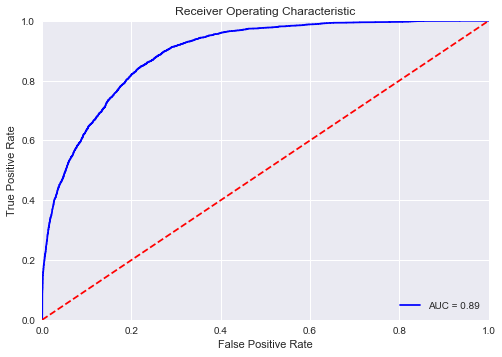

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(11, 25, 2):
    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model
    knn.fit(X_n, Y_n)

    # predict the response
    pred = knn.predict(df_norm_ts[list(features)])


    pdf = pd.DataFrame()
    data_ts['knn'] = pred.tolist()
    c = (data_ts['knn'].reset_index(drop=True) ==test_Y.reset_index(drop=True)).sum()
    print("knn accuracy: with k = ",i," = ", c/len(test_X))

knn accuracy: with k =  11  =  0.839508632138
knn accuracy: with k =  13  =  0.841434262948
knn accuracy: with k =  15  =  0.843559096946
knn accuracy: with k =  17  =  0.841965471448
knn accuracy: with k =  19  =  0.842695883134
knn accuracy: with k =  21  =  0.841965471448
knn accuracy: with k =  23  =  0.844488711819


In [46]:
for i in range(15,16):
    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model
    knn.fit(X_n, Y_n)

    # predict the response
    pred = knn.predict(df_norm_ts[list(features)])


    pdf = pd.DataFrame()
    data_ts['knn'] = pred.tolist()
    c = (data_ts['knn'].reset_index(drop=True) ==test_Y.reset_index(drop=True)).sum()
    tp, fn, fp, tn = confusion_matrix(data_ts['Income'],data_ts['knn']).ravel()
results_K(tp,fp,fn,tn)

True Positive:        10384
False Positive:       1380
True Negative:        2320
False Negative:       976
Precision:            0.882692961578
Recall:               0.914084507042
F-Measure:            0.89811451306
Classification rate:  0.843559096946
Error rate:           0.156440903054


In [47]:
probs = knn.predict_proba(df_norm_ts[list(features)])
fpr, tpr, thresholds = metrics.roc_curve(data_ts['Income'], probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.891426960411


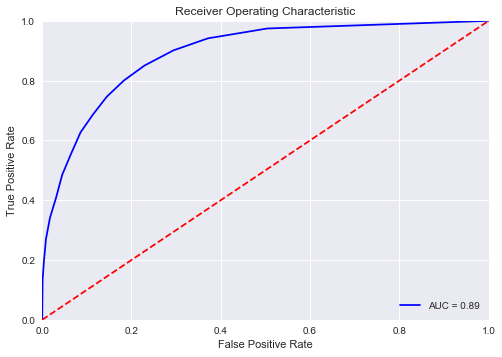

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()